# Assignment-PCA

In [13]:
url = 'https://raw.githubusercontent.com/ekochmar/cl-datasci-pnp/master/DSPNP_practical1/housing/housing.csv'
housing = pandas.read_csv(url)
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

**Question 1.** Use principal components analysis (PCA) on the above list of features. You should scale the columns appropriately. Plot a scatter plot of the first two components, and colour-code the points by `ocean_proximity`.

Note: A quick and dirty way to colour-code a scatter plot in `matplotlib` is with
```
for lvl in distinct levels of some feature z:
    i = (z == lvl)
    plt.scatter(x[i], y[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
```

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
X = housing.loc[:, features].copy()

Impute the missing values

In [76]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X) # recall: this returns np.array

In [77]:
# for i in range(len(features)):
#     X[:, i] /= X[:, i].std()

In [78]:
# put features on the same (z-score) scale
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X = transformer.fit_transform(X)


In [79]:
assert sum(X[:,k].std().round(1) for k in range(len(features)))  == len(features) # sanity check

In [80]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(X)


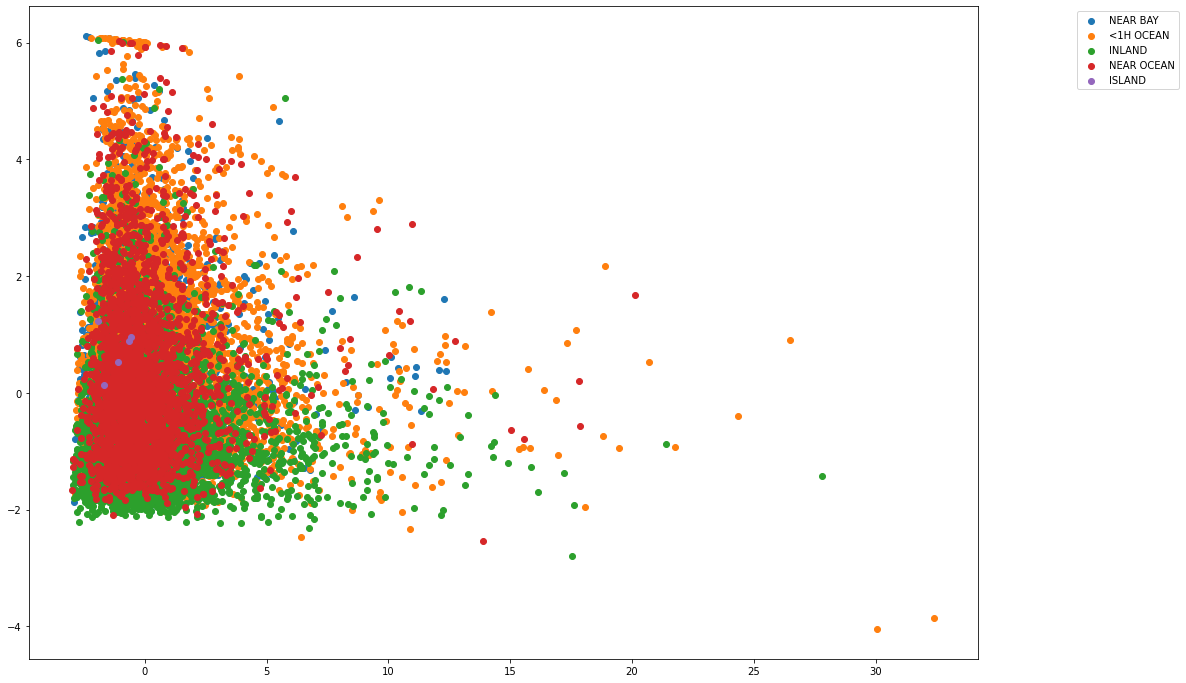

In [81]:
#plot pricipal component 1 against 2
plt.figure(figsize=(17,12))
p1, p2 = pca_result[:, 0], pca_result[:, 1]
for lvl in housing.ocean_proximity.unique():
    i = (housing.ocean_proximity == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

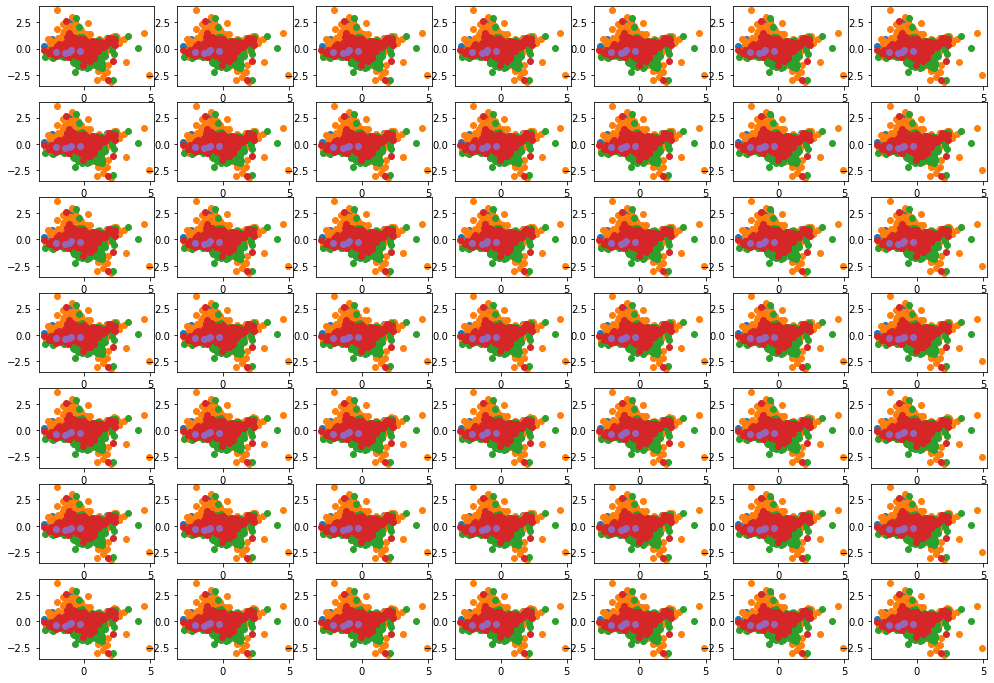

In [82]:
plt.subplots(len(features), len(features), sharex='col', figsize=(17, 12), sharey='row')
p1, p2 = pca_result[:, 3], pca_result[:, 5]
for row in range(len(features)):
    for col in range(len(features)):
        plt.subplot(len(features), len(features), row*len(features)+col+1)
        for lvl in housing.ocean_proximity.unique():
            i = (housing.ocean_proximity == lvl)
            plt.scatter(p1[i], p2[i], label=lvl)
plt.show()

No evident separation in the PCA plots occurs

<div style="height: 5em"></div>

**Question 2.** Answer question 1 but using t-SNE rather than PCA. Which method seems to produce more helpful clustering?

Note: For speed, you may like to answer questions 1 and 2 working with a subset of several thousand rows, rather than using the full dataset, because t-SNE is slow.

In [86]:
indices = np.random.choice(range(len(X)), size=3000, replace=False)

In [92]:
X_sample = X[indices]
housing_sample = housing.loc[indices]

In [89]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_result = tsne.fit_transform(X_sample)

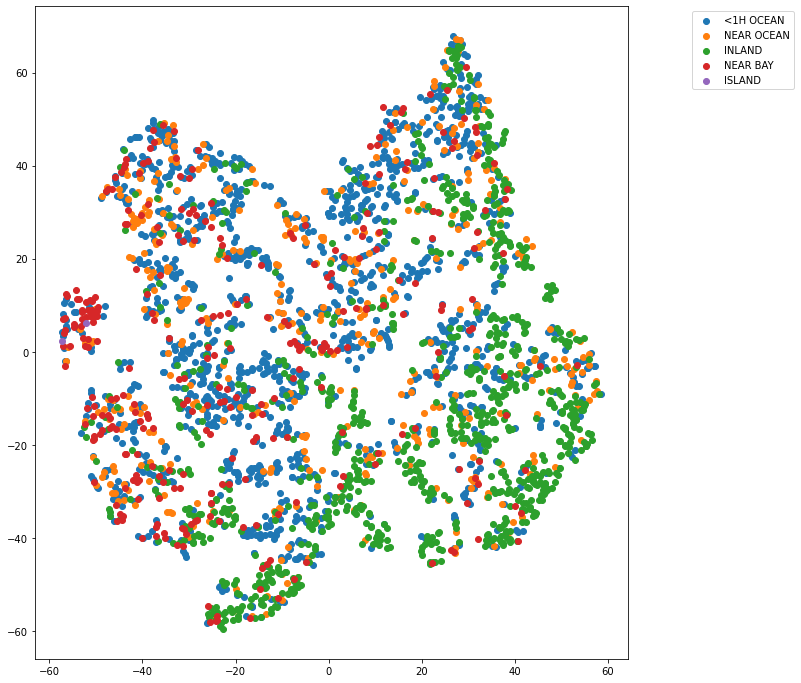

In [98]:
plt.figure(figsize=(17,12))
p1, p2 = tsne_result[:, 0], tsne_result[:, 1]
for lvl in housing_sample.ocean_proximity.unique():
    i = (housing_sample.ocean_proximity == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

Much better!

<div style="height: 5em"></div>

**Question 3.** In the t-SNE plot in Section 1.4 above, why did I use `set_aspect('equal')`? Why didn't I choose to use it for the PCA plot?

***Answer***: Because on a (locally euclidean) manifold length sacles have no absolute (global) meaning

<div style="height: 5em"></div>

**Question 4.** Repeat question 2 but using a range of values of perplexity, in the range \[5,50\]. Do you see different clustering for different values of perplexity?

Note: perplexity is mentioned in the [sklearn.manifold.TSNE reference](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Here's a good read on [how to use t-SNE effectively](https://distill.pub/2016/misread-tsne/).

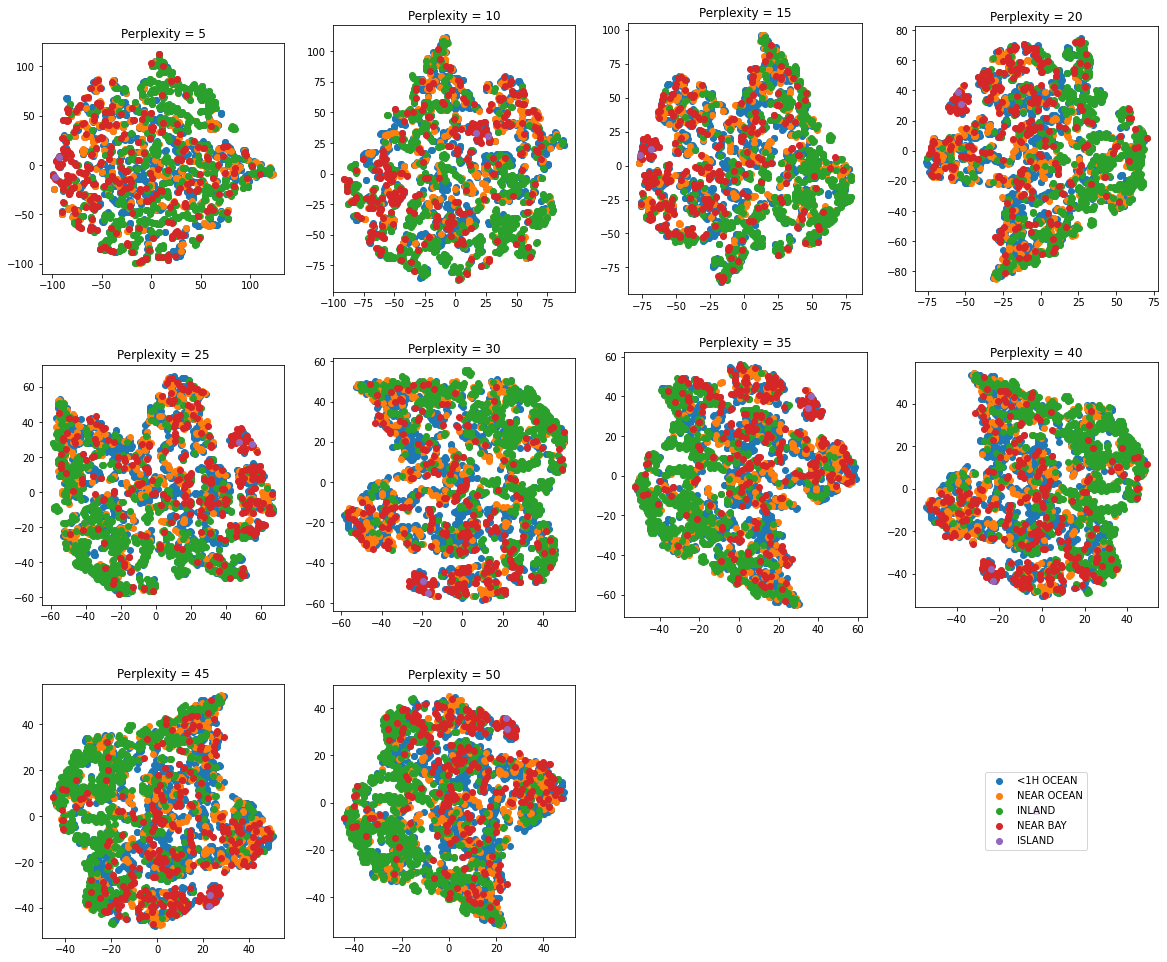

In [128]:
from sklearn.manifold import TSNE

plt.figure(figsize=(20,17))  # [end included] (stop-start)/step + 1 = 45/5+1 = 10 

for k, perp in enumerate(range(5, 51, 5)):
    tsne = TSNE(perplexity=perp)
    tsne_result = tsne.fit_transform(X_sample)
    plt.subplot(3, 4, k+1)
    
    p1, p2 = tsne_result[:, 0], tsne_result[:, 1]
    for lvl in housing_sample.ocean_proximity.unique():
        i = (housing_sample.ocean_proximity == lvl)
        plt.scatter(p1[i], p2[i], label=lvl)
        plt.title(f'Perplexity = {perp}')
    plt.gca().set_aspect('equal')

plt.subplot(3,4,12)
for lvl in housing_sample.ocean_proximity.unique():
        i = (housing_sample.ocean_proximity == lvl)
        plt.scatter(0, 0, label=lvl)
        plt.axis('off')
        plt.legend(loc='center')

plt.show()
    

<div style="height: 5em"></div>

**Question 5.** Run PCA as in question 1. Let $X$ be the full feature matrix, of size $n\times K$, and let $\tilde{X}^L$ be the approximation to $X$ using only the first $L$ principal components, $L=0,\dots,K$. Plot a bar chart with $L$ on the $x$-axis, and the mean square error 
$$
\operatorname{MSE} = \frac{1}{n}\sum_{i=1}^n \sum_{k=1}^K(X_{i,k}-\tilde{X}^L_{i,k})^2
$$ on the $y$-axis.

Hint: [`plt.bar(x,y)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) plots a bar char.

<div style="height: 5em"></div>
The mean square error is not found as above.
$$ \operatorname{MSE} = \frac{1}{n} \sum_{i=1}^n \sum_{k=L+1}^{K}(X_{i,k}-\tilde{X}^L_{i,k})^2 $$

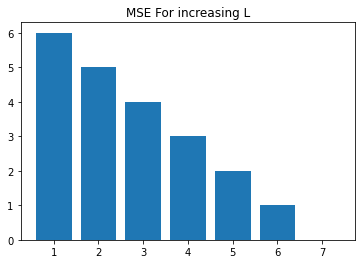

In [151]:
results = {}
K = len(features)
for L in range(1, K+1):
    result = 0
    for col in range(L, K): # convert 1-based to 0-based indexing
        result += np.mean(np.square(X[:, col]))
    results[L] = result 

plt.bar(results.keys(), height=results.values())
plt.title('MSE For increasing L')
plt.show()